# ISLP - Chapter 10 - Exercise 4
### Author: pzuehlke

In [57]:
import numpy as np
import matplotlib  # needed to create a custom color map
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

To obtain the non-linear data we will use `make_circles` from sklearn, which
generates an equal number of points arranged in two concentric circles, plus some
random jiggling that we can control:

In [ ]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

Let's visualize the points:

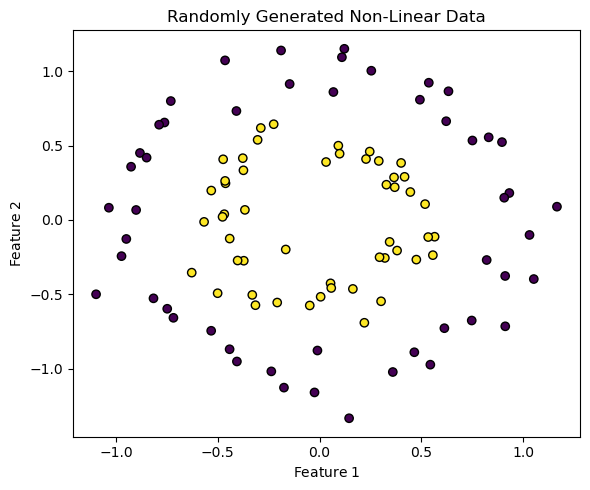

In [54]:
# Visualize the data
fig, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor="k")
ax.set_title("Randomly Generated Non-Linear Data")
ax.set_xlabel("Feature $ 1 $")
ax.set_ylabel("Feature $ 2 $")
fig.tight_layout()
plt.show()

As in the lab, we will fit five models with `SVC` from sklearn:
* Support vector classifiers involving polynomial
  transformations of the features having max degrees $ 1 $ through $ 4 $, all of
  them with "budget" (margin regularization constant) $ C = 1 $;
* A support vector machine with radial kernel.

In [ ]:
# Create three SVM models with different kernels:
models = {
    "Linear SVC":       SVC(kernel="linear", degree=1, C=1, random_state=0),
    "Quadratic SVC":    SVC(kernel="poly",   degree=2, C=1, random_state=0),
    "Cubic SVC":        SVC(kernel="poly",   degree=3, C=1, random_state=0),
    "Quartic SVC":      SVC(kernel="poly",   degree=4, C=1, random_state=0),
    "RBF SVM":          SVC(kernel="rbf",    gamma="scale", C=1, random_state=0)
}

# Train all models:
for model in models.values():
    model.fit(X_train, y_train)

We now create a procedure to automate the computation of the training and test
error rates for all models:

In [50]:
def calculate_error_rate(model, X, y):
    """ Function to compute error rates (1 - accuracy). """
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    return 1 - accuracy

Now let's effectively compute and report the error rates:

In [51]:
# Compute the error rates for each model:
results = {name: {
    "train_error": calculate_error_rate(model, X_train, y_train),
    "test_error": calculate_error_rate(model, X_test, y_test)
} for name, model in models.items()}

# Display results:
for name, metrics in results.items():
    print(f"{name}:")
    print(f"\tTraining Error: {metrics['train_error']:.4f}")
    print(f"\tTest Error: {metrics['test_error']:.4f}")

Linear SVC:
	Training Error: 0.4000
	Test Error: 0.5333
Quadratic SVC:
	Training Error: 0.0000
	Test Error: 0.0000
Cubic SVc:
	Training Error: 0.2571
	Test Error: 0.3333
Quartic SVC:
	Training Error: 0.0000
	Test Error: 0.0333
RBF SVM:
	Training Error: 0.0000
	Test Error: 0.0000


We see that both the quadratic SVC and the SVM achieve a perfect fit even in the
test set, with the quartic model trailing closely but slightly overfitting the
training data. The linear and cubic SVC perform poorly.

Instead of using the pre-made `plot_svm` function as in the lab, we will create
our own procedure to visualize the decision boundaries:

In [ ]:
def plot_decision_boundary(ax, model, X, y, title):
    """ Plots decision boundaries. """
    # Set the limits slightly beyond the data range:
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    # Create a mesh grid:
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    # Predict on the mesh grid points:
    Z = model.predict(np.column_stack((xx.ravel(), yy.ravel())))
    Z = Z.reshape(xx.shape)
    
    # Create a custom colormap with blue and orange and make a contour plot:
    custom_cmap = matplotlib.colors.ListedColormap(['#4169E1', '#FFA500'])
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=custom_cmap)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, edgecolor="k")
    
    ax.set_title(title)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

Let's visualize the colored grids and decision boundaries corresponding to each model:

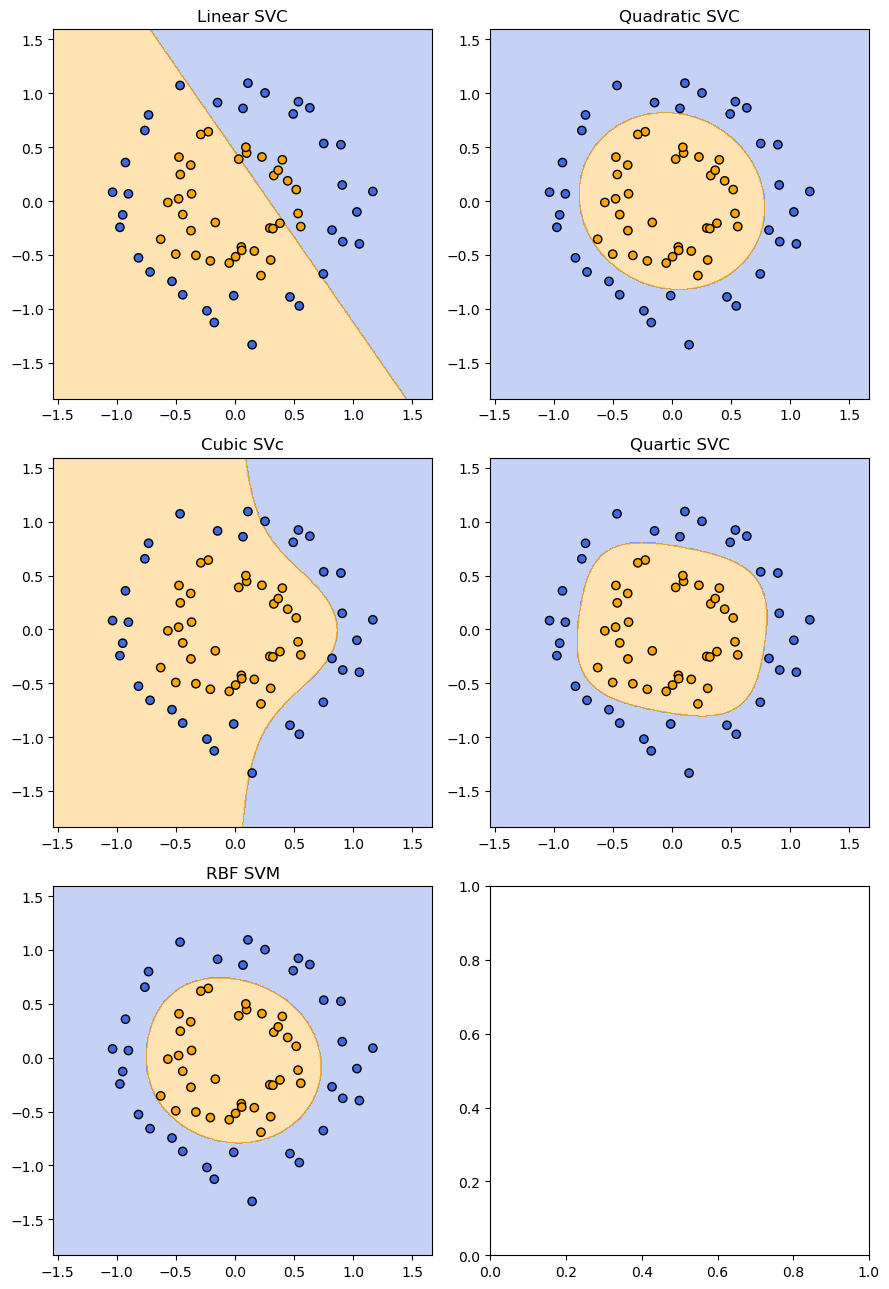

In [67]:
fig, axs = plt.subplots(3, 2, figsize=(9, 13))

# Plot each model
for i, (name, model) in enumerate(models.items()):
    plot_decision_boundary(axs[i // 2, i % 2], model, X_train, y_train, name)

plt.tight_layout()
plt.show()

Finally, we display the training and test error rates as bar charts:

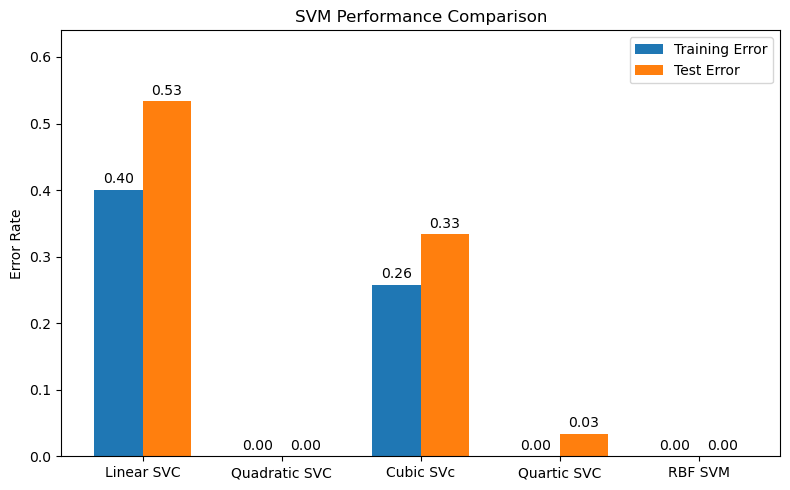

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

model_names = list(results.keys())
train_errors = [results[name]["train_error"] for name in model_names]
test_errors = [results[name]["test_error"] for name in model_names]

x = np.arange(len(model_names))
width = 0.35
ax.bar(x - width/2, train_errors, width, label="Training error")
ax.bar(x + width/2, test_errors, width, label="Test error")

ax.set_ylabel("Error rate")
ax.set_title("SVM performance comparison")
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
ax.set_ylim(0, max(max(train_errors), max(test_errors)) * 1.2)

# Add value labels on bars:
for i, v in enumerate(train_errors):
    ax.text(i - width/2, v + 0.01, f"{v:.2f}", ha="center")
for i, v in enumerate(test_errors):
    ax.text(i + width/2, v + 0.01, f"{v:.2f}", ha="center")

plt.tight_layout()
plt.show()